# **GETING STARTED WITH NEURAL NETWORK: CALSSIFICATION AND REGRESSION**

There will be three task:
1. Classifiying movie reviews as positive or negative (binary classification)
2. Classifiying news wires by topic (mullticlass classfication)
3. Estimating the price of a house, given real-estate data (scalar regression)

These example will be our first contact with end-to-end deep learning workflows

## **CLASSIFYING MOVIE REVIEWS: A binary classification example**

### **THE ***IMDB*** DATASET**

**I am gonna use tensor dataset and slap it onto the the pytorch model** Why? Don't ask beacuase I am tanvir

In [1]:
import pandas as pd
df = pd.read_csv("../data/IMDB/IMDB Dataset.csv.zip")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [3]:
(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=10000)

The argument num_words=10000 means you'll only kepp the top 10,000 most frequently occuring words in the training dta. Rare words will be discarded. This allows us to work with vector data of manageable size. if we didn't set this limit, we'd be working with 99,585 uniqe words in the trainig data, ehich will be unnecessaryliy large. Many of these words only occur in a signle sample, and thus can't be meaning fully unsed for classification

In [4]:
train_x[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_x.shape

(25000,)

For kiks, here's how you can quickly decode one of these reviews back to Englsih words.

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i-3, "?")for i in train_x[0]])

In [7]:
word_index, '\n', reverse_word_index, '\n', decoded_review

({'fawn': 34701,
  'tsukino': 52006,
  'nunnery': 52007,
  'sonja': 16816,
  'vani': 63951,
  'woods': 1408,
  'spiders': 16115,
  'hanging': 2345,
  'woody': 2289,
  'trawling': 52008,
  "hold's": 52009,
  'comically': 11307,
  'localized': 40830,
  'disobeying': 30568,
  "'royale": 52010,
  "harpo's": 40831,
  'canet': 52011,
  'aileen': 19313,
  'acurately': 52012,
  "diplomat's": 52013,
  'rickman': 25242,
  'arranged': 6746,
  'rumbustious': 52014,
  'familiarness': 52015,
  "spider'": 52016,
  'hahahah': 68804,
  "wood'": 52017,
  'transvestism': 40833,
  "hangin'": 34702,
  'bringing': 2338,
  'seamier': 40834,
  'wooded': 34703,
  'bravora': 52018,
  'grueling': 16817,
  'wooden': 1636,
  'wednesday': 16818,
  "'prix": 52019,
  'altagracia': 34704,
  'circuitry': 52020,
  'crotch': 11585,
  'busybody': 57766,
  "tart'n'tangy": 52021,
  'burgade': 14129,
  'thrace': 52023,
  "tom's": 11038,
  'snuggles': 52025,
  'francesco': 29114,
  'complainers': 52027,
  'templarios': 52125,

### **PREPARING THE DATA**

We have to turn the integers into tensors, in one of the two ways:
* Pad our list so that they all have the same lenght
* Mulit-hot encode your list to turn them into vectors of 0s and 1s.

In [8]:
import numpy as np
def vecorize_sequences(sequences, dimenstion=10000):
    results = np.zeros((len(sequences), dimenstion),dtype=np.float32)
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1
    return results
X_train = vecorize_sequences(train_x)
X_test = vecorize_sequences(test_x)

In [9]:
X_train.size, X_train.shape

(250000000, (25000, 10000))

In [10]:
y_train = np.asarray(train_y).astype("float32")
y_test = np.asarray(test_y).astype("float32")

In [11]:
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

### **BUILDING OUR MODEL**

In [12]:
from torch import nn
import torch

model = nn.Sequential(
    nn.Linear(10_000, 16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

In [13]:
optimizer=torch.optim.RMSprop(model.parameters(), lr=0.001)
criterion = nn.BCELoss()
def accuracy(y_pred, y_true):
    preds = (y_pred >0.5).float()
    return (preds==y_true).float().mean()

### **VALIDATING YOUR APPROCH**

In [14]:
from torch.utils.data import random_split, DataLoader
from sklearn.model_selection import train_test_split

X_partial, X_val, y_partial, y_val = train_test_split(X_train_t, y_train_t, test_size=0.1, random_state=42)
train_dataset = TensorDataset(X_partial, y_partial)
val_dataset = TensorDataset(X_val, y_val)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [15]:
device = torch.device("cpu")
model = model.to(device)

In [16]:
@torch.no_grad()
def evaluate(model, loader):
    model.eval()
    loss_sum, acc_sum, n = 0.0, 0.0, 0
    for x, y in loader:
        x, y = x.to(device), y.to(device)
        logits = model(x).squeeze(1)
        loss = criterion(logits, y)
        b = x.size(0)
        loss_sum += loss.item() * b
        acc_sum += accuracy(logits, y).item() * b
        n+=b
    return loss_sum/n,acc_sum/n

In [17]:
def fit(model, epochs, train_loader, val_loader):
    history = {'loss': [], 'acc':[], 'val_loss':[], 'val_acc':[]}
    for epoch in range(1, epochs+1):
        model.train()
        loss_sum, acc_sum, n = 0.0, 0.0, 0
        for x,y in train_loader: 
            x, y = x.to(device), y.to(device)

            optimizer.zero_grad()
            logits = model(x).squeeze(1)
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()

            b = x.size(0)
            loss_sum += loss.item() * b
            acc_sum += accuracy(logits, y).item() * b
            n+=b
        train_loss, train_acc = loss_sum/n, acc_sum/n
        val_loss, val_acc = evaluate(model, val_loader)
        history['loss'].append(train_loss)
        history['acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        print(f"Epoch {epoch:2d} | "
              f"loss {train_loss:.4f} acc {train_acc:.4f} | "
              f"val_loss {val_loss:.4f} val_acc {val_acc:.4f}")
    return history

In [18]:
history = fit(model=model, epochs=20, train_loader=train_loader, val_loader=val_loader)

Epoch  1 | loss 0.3184 acc 0.8688 | val_loss 0.2757 val_acc 0.8840
Epoch  2 | loss 0.1900 acc 0.9272 | val_loss 0.2994 val_acc 0.8792
Epoch  3 | loss 0.1493 acc 0.9456 | val_loss 0.3835 val_acc 0.8564
Epoch  4 | loss 0.1185 acc 0.9578 | val_loss 0.3959 val_acc 0.8688
Epoch  5 | loss 0.0920 acc 0.9689 | val_loss 0.4453 val_acc 0.8636
Epoch  6 | loss 0.0655 acc 0.9767 | val_loss 0.5226 val_acc 0.8608
Epoch  7 | loss 0.0430 acc 0.9854 | val_loss 1.2312 val_acc 0.8184
Epoch  8 | loss 0.0262 acc 0.9907 | val_loss 0.9553 val_acc 0.8584
Epoch  9 | loss 0.0155 acc 0.9944 | val_loss 1.2932 val_acc 0.8564
Epoch 10 | loss 0.0120 acc 0.9962 | val_loss 1.3288 val_acc 0.8576
Epoch 11 | loss 0.0060 acc 0.9980 | val_loss 1.7465 val_acc 0.8556
Epoch 12 | loss 0.0035 acc 0.9988 | val_loss 2.0253 val_acc 0.8528
Epoch 13 | loss 0.0050 acc 0.9987 | val_loss 2.3232 val_acc 0.8520
Epoch 14 | loss 0.0023 acc 0.9993 | val_loss 2.6893 val_acc 0.8504
Epoch 15 | loss 0.0023 acc 0.9992 | val_loss 3.3600 val_acc 0.

In [19]:
history

{'loss': [0.318402348717716,
  0.19002530669901105,
  0.1493011081536611,
  0.118496953588393,
  0.09202610944509507,
  0.0654556178788344,
  0.043024881292382876,
  0.026221410262692046,
  0.015523103586170409,
  0.012045935275167641,
  0.005992755359130711,
  0.0035461285552547553,
  0.0050314132836096785,
  0.002276375342584813,
  0.0022765023630889726,
  0.0009290792576676773,
  0.0006152497960864139,
  0.0013418128065381583,
  0.0009075018059409053,
  0.00041464972345229775],
 'acc': [0.8688,
  0.9272444444444444,
  0.9456,
  0.9578222222222222,
  0.9689333333333333,
  0.9766666666666667,
  0.9854222222222222,
  0.9907111111111111,
  0.9944444444444445,
  0.9962222222222222,
  0.9980444444444444,
  0.9988444444444444,
  0.9987111111111111,
  0.9993333333333333,
  0.9992,
  0.9996888888888888,
  0.9997777777777778,
  0.9998222222222222,
  0.9996888888888888,
  0.9997777777777778],
 'val_loss': [0.2756550811767578,
  0.2993797315597534,
  0.38351151304244996,
  0.3958831111907959,
 

#### PLOTING THE TRAINING AND VALIDATION LOSS

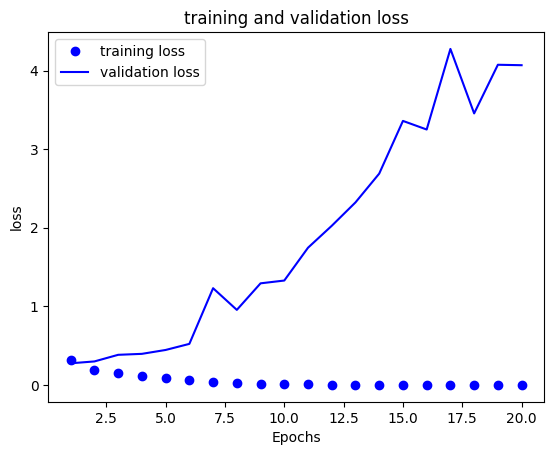

In [20]:
import matplotlib.pyplot as plt
epochs = np.arange(1,21)
loss_values = history['loss']
val_loss_values = history['val_loss']
plt.plot(epochs, loss_values, "bo", label="training loss" )
plt.plot(epochs, val_loss_values, "b", label="validation loss")
plt.title("training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

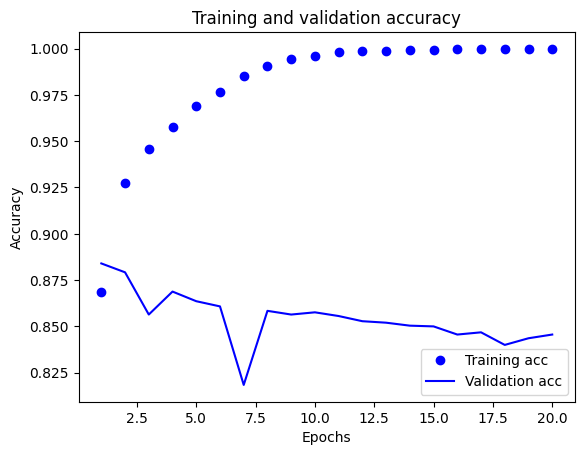

In [21]:
plt.clf()
acc = history["acc"]
val_acc = history["val_acc"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

This is an example of overfitting now we gonna run to the model again but this time the epoch will be only 4

In [22]:
model2 = nn.Sequential(
    nn.Linear(10000, 16), nn.ReLU(),
    nn.Linear(16, 16), nn.ReLU(),
    nn.Linear(16, 1), nn.Sigmoid()
)
model2 = model2.to(device)

In [23]:
optimizer=torch.optim.RMSprop(model2.parameters(), lr=0.001)
criterion = nn.BCELoss()
def accuracy(y_pred, y_true):
    preds = (y_pred >0.5).float()
    return (preds==y_true).float().mean()

In [24]:
history = fit(model=model2, epochs=10, train_loader=train_loader, val_loader=val_loader)

Epoch  1 | loss 0.3263 acc 0.8728 | val_loss 0.3204 val_acc 0.8720
Epoch  2 | loss 0.1908 acc 0.9283 | val_loss 0.2939 val_acc 0.8796
Epoch  3 | loss 0.1488 acc 0.9472 | val_loss 0.3265 val_acc 0.8788
Epoch  4 | loss 0.1174 acc 0.9586 | val_loss 0.3765 val_acc 0.8652
Epoch  5 | loss 0.0879 acc 0.9689 | val_loss 0.4484 val_acc 0.8712
Epoch  6 | loss 0.0585 acc 0.9800 | val_loss 0.5518 val_acc 0.8592
Epoch  7 | loss 0.0350 acc 0.9889 | val_loss 0.7841 val_acc 0.8604
Epoch  8 | loss 0.0199 acc 0.9939 | val_loss 0.9806 val_acc 0.8612
Epoch  9 | loss 0.0113 acc 0.9967 | val_loss 1.2433 val_acc 0.8576
Epoch 10 | loss 0.0074 acc 0.9980 | val_loss 1.4835 val_acc 0.8484


In [25]:
model(X_test_t)

tensor([[5.3907e-06],
        [1.0000e+00],
        [1.0000e+00],
        ...,
        [9.9944e-01],
        [4.8596e-09],
        [4.3702e-10]], grad_fn=<SigmoidBackward0>)